In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

In [2]:
data = pd.read_csv("FuelConsumption.csv", index_col = False)
#data = pd.read_csv("FuelConsumption.csv")

data.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [3]:
data = data[['FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS']]
data.rename(columns = {'FUELCONSUMPTION_COMB_MPG' : 'Combustion', 'CO2EMISSIONS' : 'Emission'}, inplace = True)

In [4]:
data.head()

,Combustion,Emission
0,33,196
1,29,221
2,48,136
3,25,255
4,27,244


In [5]:
data.shape

(1067, 2)

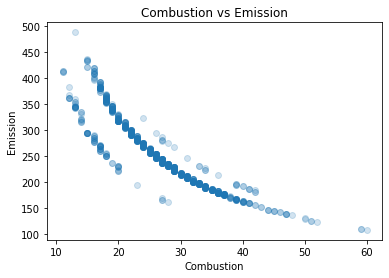

In [6]:
plt.scatter(data.Combustion, data.Emission, alpha = 0.2)
plt.xlabel('Combustion')
plt.ylabel('Emission')
plt.title('Combustion vs Emission')
plt.show()

In [7]:
X = data.drop(columns = 'Emission')
Y = data['Emission']

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [9]:
L = LinearRegression()

In [10]:
L.fit(X_train, Y_train)

LinearRegression()

In [11]:
Y_pred = L.predict(X_test)

In [12]:
print("R2 Score: ", r2_score(Y_test, Y_pred))
print("RMSE Score: ", np.sqrt(mean_squared_error(Y_test, Y_pred)))

R2 Score:  0.8107402279142806
RMSE Score:  27.686976481096174


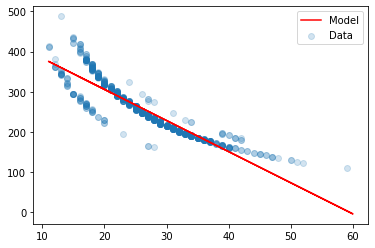

In [13]:
plt.plot(X_test, Y_pred, label = "Model", color = "red")
plt.scatter(X_train, Y_train, label = "Data", alpha = 0.2)
plt.legend()
plt.show()

In [14]:
poly = PolynomialFeatures(degree = 7)

In [15]:
X_poly_train = poly.fit_transform(X_train)
L1 = LinearRegression()
L1.fit(X_poly_train, Y_train)
X_poly_test = poly.fit_transform(X_test)
Y_pred_poly = L1.predict(X_poly_test)
X_poly_test.shape

(214, 8)

In [16]:
print("R2 Score: ", r2_score(Y_test, Y_pred_poly))
print("RMSE Score: ", np.sqrt(mean_squared_error(Y_test, Y_pred_poly)))

R2 Score:  0.8606822946135151
RMSE Score:  23.754699003955217


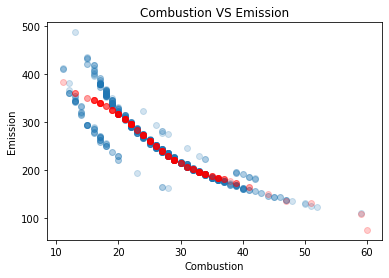

In [17]:
plt.scatter(X_train, Y_train, label = 'data', alpha = 0.2)
plt.scatter(X_test, Y_pred_poly, label = 'Model', color = 'red', alpha = 0.2)
plt.xlabel('Combustion')
plt.ylabel('Emission')
plt.title('Combustion VS Emission')
plt.show()

In [18]:
def polynomialRegression(X, Y, K):
    poly = PolynomialFeatures(degree = K)
    X_poly = poly.fit_transform(X)
    X_train, X_test, Y_train, Y_test = train_test_split(X_poly, Y, test_size = 0.2)
    L = LinearRegression()
    L.fit(X_train, Y_train)
    training_score = r2_score(Y_train, L.predict(X_train))
    testing_score = r2_score(Y_test, L.predict(X_test))
    return training_score, testing_score

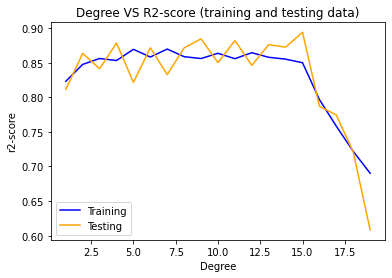

In [28]:
train = []
test = []
for i in range(1, 20):
    r2_train, r2_test = polynomialRegression(X, Y, i)
    train.append(r2_train)
    test.append(r2_test)
x = np.arange(19) + 1 
plt.plot(x, train, label = "Training", color = "blue")
plt.plot(x, test, label = "Testing", color = "orange")
plt.xlabel("Degree")
plt.ylabel("r2-score")
plt.legend()
plt.title("Degree VS R2-score (training and testing data)")
plt.show()

    